In [125]:
import bs4
import requests
import lxml
import re
import pandas
import matplotlib.pyplot as plt

In [2]:
res = requests.get("https://www.anbima.com.br/informacoes/est-termo/CZ.asp")
soup = bs4.BeautifulSoup(res.text,'lxml')

c:\Users\felip\anaconda3\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [154]:
data = {
    "vértices":[],
    "ETTJ IPCA":[],
    "ETTJ PRE":[],
    "Inflação Implícita":[],
}

In [155]:
def adidata(resultado):
    if len(resultado) == 4:
        data['vértices'].append(int(resultado[0].replace('.',"")))
        data['ETTJ IPCA'].append(float(resultado[1].replace(',','.')))
        data['ETTJ PRE'].append(float(resultado[2].replace(',','.')))
        data['Inflação Implícita'].append(float(resultado[3].replace(',','.')))
    elif len(resultado) == 2:
        data['vértices'].append(int(resultado[0].replace('.',"")))
        data['ETTJ IPCA'].append(float(resultado[1].replace(',',".")))
        data['ETTJ PRE'].append(None)
        data['Inflação Implícita'].append(None)

In [156]:
for item in soup.select('table')[5].select('tr'):
   resultado = re.findall(r'(?<!/)\d\d\d|(?<!/)\d+,\d+|(?<!/)\d+.\d+', item.text)
   adidata(resultado)

In [158]:
df = pandas.DataFrame(data).set_index('vértices')

In [159]:
df[df['ETTJ PRE'].notna()]['ETTJ PRE'].max()

11.8767

In [170]:
df[df.index == 504]['ETTJ PRE'].values[0]

10.7115

<Axes: xlabel='vértices'>

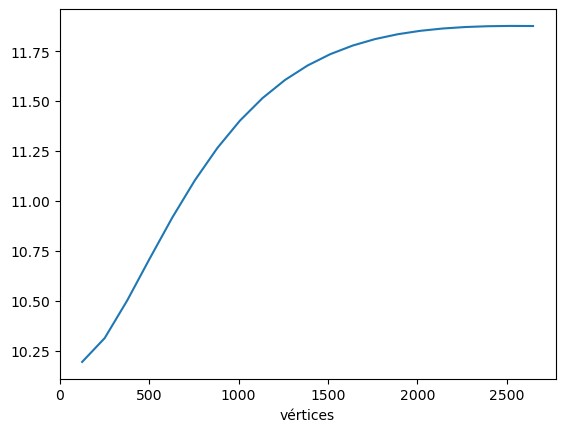

In [161]:
df['ETTJ PRE'].plot.line()

array([<Axes: xlabel='vértices'>, <Axes: xlabel='vértices'>,
       <Axes: xlabel='vértices'>], dtype=object)

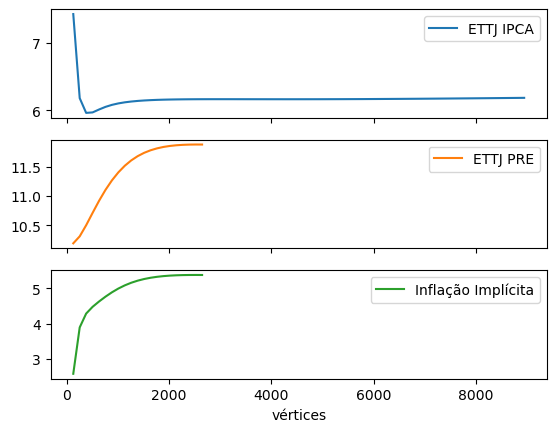

In [162]:
df.plot.line(subplots=True)

<Axes: xlabel='vértices'>

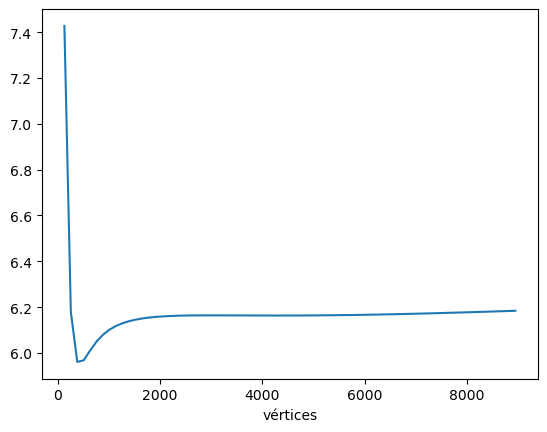

In [165]:
df['ETTJ IPCA'].plot()

In [221]:
lista = [21,42,63,126,252]

lista2=[(49,21),(28,42),(7,63),(56,126),(182,252)]

In [238]:
x = 300

In [213]:
def diferenca(y):
    z = abs(x-y)
    return (z,y)


In [223]:
lista[lista.index(min(map(diferenca,lista))[1])]

63

In [231]:
lista = df.index.to_list()

In [240]:
min(map(diferenca,lista))[1]

252

In [241]:
df[df.index == min(map(diferenca,lista))[1]]

,ETTJ IPCA,ETTJ PRE,Inflação Implícita
vértices,,,
252,6.1798,10.3122,3.8918


In [267]:
df.iloc[1]['ETTJ PRE']

10.3122